In [ ]:
#| include: false
#| default_exp ml
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
#%load_ext autoreload
#%autoreload 2

In [ ]:
#| export
from glycowork.ml.models import *
from glycowork.ml.inference import *
from glycowork.ml.processing import *
from glycowork.ml.model_training import *
from glycowork.ml.train_test_split import *
from glycowork.glycan_data.loader import df_species, df_glycan

`ml` contains the code base to process glycan for machine learning, construct state-of-the-art machine learning models, train them, and analyze trained models + glycan representations. It currently contains the following modules:

- `model_training` contains functions for training machine learning models
- `models` describes some examples for machine learning architectures applicable to glycans
- `processing` contains helper functions to prepare glycan data for model training
- `inference` can be used to analyze trained models, make predictions, or obtain glycan representations
- `train_test_split` contains various data split functions to get appropriate training and test sets

## model_training
>contains functions for training machine learning models

In [ ]:
show_doc(EarlyStopping)

---

### EarlyStopping

>      EarlyStopping (patience:int=7, verbose:bool=False)

*Early stops the training if validation loss doesn't improve after a given patience*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| patience | int | 7 | epochs to wait after last improvement |
| verbose | bool | False | whether to print messages |
| **Returns** | **None** |  |  |

In [ ]:
show_doc(train_model)

---

### train_model

>      train_model (model:torch.nn.modules.module.Module,
>                   dataloaders:dict[str,torch.utils.data.dataloader.DataLoader]
>                   , criterion:torch.nn.modules.module.Module,
>                   optimizer:torch.optim.optimizer.Optimizer,
>                   scheduler:torch.optim.lr_scheduler.LRScheduler,
>                   num_epochs:int=25, patience:int=50,
>                   mode:str='classification', mode2:str='multi',
>                   return_metrics:bool=False)

*trains a deep learning model on predicting glycan properties*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| model | Module |  | graph neural network for analyzing glycans |
| dataloaders | dict |  | dict with 'train' and 'val' loaders |
| criterion | Module |  | PyTorch loss function |
| optimizer | Optimizer |  | PyTorch optimizer, has to be SAM if mode != "regression" |
| scheduler | LRScheduler |  | PyTorch learning rate decay |
| num_epochs | int | 25 | number of epochs for training |
| patience | int | 50 | epochs without improvement until early stop |
| mode | str | classification | 'classification', 'multilabel', or 'regression' |
| mode2 | str | multi | 'multi' or 'binary' classification |
| return_metrics | bool | False | whether to return metrics |
| **Returns** | **torch.nn.modules.module.Module \| tuple[torch.nn.modules.module.Module, dict[str, dict[str, list[float]]]]** |  | **best model from training and the training and validation metrics** |

In [ ]:
show_doc(training_setup)

---

### training_setup

>      training_setup (model:torch.nn.modules.module.Module, lr:float,
>                      lr_patience:int=4, factor:float=0.2,
>                      weight_decay:float=0.0001, mode:str='multiclass',
>                      num_classes:int=2, gsam_alpha:float=0.0,
>                      warmup_epochs:int=5)

*prepares optimizer, learning rate scheduler, and loss criterion for model training*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| model | Module |  | graph neural network for analyzing glycans |
| lr | float |  | learning rate |
| lr_patience | int | 4 | epochs before reducing learning rate |
| factor | float | 0.2 | factor to multiply lr on reduction |
| weight_decay | float | 0.0001 | regularization parameter |
| mode | str | multiclass | type of prediction task |
| num_classes | int | 2 | number of classes for classification |
| gsam_alpha | float | 0.0 | if >0, uses GSAM instead of SAM optimizer |
| warmup_epochs | int | 5 | if >0, uses a learning rate warm-up schedule for training stability |
| **Returns** | **tuple** |  | **optimizer, scheduler, criterion** |

In [ ]:
show_doc(train_ml_model)

---

### train_ml_model

>      train_ml_model (X_train:pandas.core.frame.DataFrame|list,
>                      X_test:pandas.core.frame.DataFrame|list, y_train:list,
>                      y_test:list, mode:str='classification',
>                      feature_calc:bool=False, return_features:bool=False,
>                      feature_set:list[str]=['known', 'exhaustive'], additional
>                      _features_train:pandas.core.frame.DataFrame|None=None, ad
>                      ditional_features_test:pandas.core.frame.DataFrame|None=N
>                      one)

*wrapper function to train standard machine learning models on glycans*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| X_train | pandas.core.frame.DataFrame \| list |  | training data/glycans |
| X_test | pandas.core.frame.DataFrame \| list |  | test data/glycans |
| y_train | list |  | training labels |
| y_test | list |  | test labels |
| mode | str | classification | 'classification' or 'regression' |
| feature_calc | bool | False | calculate motifs from glycans |
| return_features | bool | False | return calculated features |
| feature_set | list | ['known', 'exhaustive'] | feature set for annotations |
| additional_features_train | pandas.core.frame.DataFrame \| None | None | additional training features |
| additional_features_test | pandas.core.frame.DataFrame \| None | None | additional test features |
| **Returns** | **xgboost.sklearn.XGBModel \| tuple[xgboost.sklearn.XGBModel, pandas.core.frame.DataFrame, pandas.core.frame.DataFrame]** |  | **trained model and optionally features** |

In [ ]:
human = [1 if k == 'Homo_sapiens' else 0 for k in df_species[df_species.Order=='Primates'].Species.values.tolist()]
X_train, X_test, y_train, y_test = general_split(df_species[df_species.Order=='Primates'].glycan.values.tolist(), human)
model_ft, _, X_test = train_ml_model(X_train, X_test, y_train, y_test, feature_calc = True, feature_set = ['terminal'],
                         return_features = True)


You provided glycans without features but did not specify feature_calc; we'll step in and calculate features with the default feature_set but feel free to re-run and change.

Calculating Glycan Features...

Training model...

Evaluating model...
Accuracy of trained model on separate validation set: 0.8622183708838822


In [ ]:
show_doc(analyze_ml_model)

---

### analyze_ml_model

>      analyze_ml_model (model:xgboost.sklearn.XGBModel)

*plots relevant features for model prediction*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| model | XGBModel | trained ML model from train_ml_model |
| **Returns** | **None** |  |

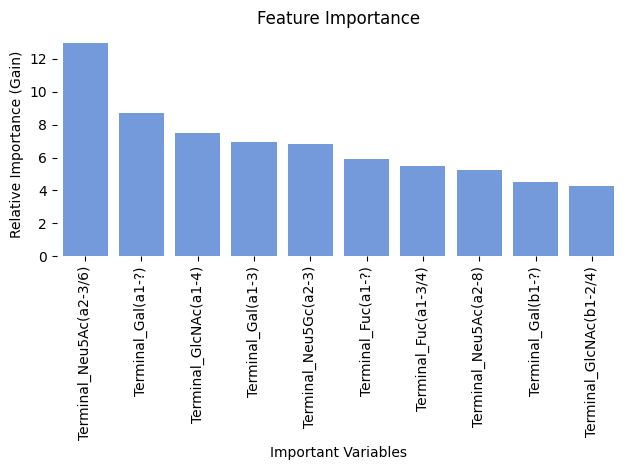

In [ ]:
analyze_ml_model(model_ft)

In [ ]:
show_doc(get_mismatch)

---

### get_mismatch

>      get_mismatch (model:xgboost.sklearn.XGBModel,
>                    X_test:pandas.core.frame.DataFrame, y_test:list, n:int=10)

*analyzes misclassifications of trained machine learning model*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| model | XGBModel |  | trained ML model from train_ml_model |
| X_test | DataFrame |  | motif dataframe for validation |
| y_test | list |  | test labels |
| n | int | 10 | number of returned misclassifications |
| **Returns** | **list** |  | **misclassifications and predicted probabilities** |

In [ ]:
get_mismatch(model_ft, X_test, y_test)

[('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 0.7464433312416077),
 ('Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.8058189749717712),
 ('GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.33463266491889954),
 ('Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)Glc-ol', 0.84605872631073),
 ('Neu5Ac(a2-3)Gal(b1-3/4)GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.8932995200157166),
 ('Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc-ol', 0.7579687237739563),
 ('Fuc(a1-3/4)[Gal(b1-3/4)]GlcNAc(b1-2)[Fuc(a1-3/4)[Gal(b1-3/4)]GlcNAc(b1-4)]Man(a1-3)[Fuc(a1-3/4)[Gal(b1-3/4)]GlcNAc(b1-2)[Fuc(a1-3/4)[Gal(b1-3/4)]GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.5918893218040466),
 ('Gal(b1-4)Glc-ol', 0.7464433312416077),
 ('Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0.8849249482154846),
 ('Neu5Gc(a2-3)Gal(b

## models
>describes some examples for machine learning architectures applicable to glycans. The main portal is prep_models which allows users to setup (trained) models by their string names

In [ ]:
show_doc(SweetNet)

---

### SweetNet

>      SweetNet (lib_size:int, num_classes:int=1, hidden_dim:int=128)

*Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self) -> None:
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| lib_size | int |  | number of unique tokens for graph nodes |
| num_classes | int | 1 | number of output classes (>1 for multilabel) |
| hidden_dim | int | 128 | dimension of hidden layers |
| **Returns** | **None** |  |  |

In [ ]:
show_doc(LectinOracle)

---

### LectinOracle

>      LectinOracle (input_size_glyco:int, hidden_size:int=128,
>                    num_classes:int=1, data_min:float=-11.355,
>                    data_max:float=23.892, input_size_prot:int=960)

*Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self) -> None:
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| input_size_glyco | int |  | number of unique tokens for graph nodes |
| hidden_size | int | 128 | layer size for graph convolutions |
| num_classes | int | 1 | number of output classes (>1 for multilabel) |
| data_min | float | -11.355 | minimum observed value in training data |
| data_max | float | 23.892 | maximum observed value in training data |
| input_size_prot | int | 960 | dimensionality of protein representations |
| **Returns** | **None** |  |  |

In [ ]:
show_doc(LectinOracle_flex)

---

### LectinOracle_flex

>      LectinOracle_flex (input_size_glyco:int, hidden_size:int=128,
>                         num_classes:int=1, data_min:float=-11.355,
>                         data_max:float=23.892, input_size_prot:int=1000)

*Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self) -> None:
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| input_size_glyco | int |  | number of unique tokens for graph nodes |
| hidden_size | int | 128 | layer size for graph convolutions |
| num_classes | int | 1 | number of output classes (>1 for multilabel) |
| data_min | float | -11.355 | minimum observed value in training data |
| data_max | float | 23.892 | maximum observed value in training data |
| input_size_prot | int | 1000 | maximum protein sequence length for padding/cutting |
| **Returns** | **None** |  |  |

In [ ]:
show_doc(NSequonPred)

---

### NSequonPred

>      NSequonPred ()

*Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self) -> None:
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool*

In [ ]:
show_doc(init_weights)

---

### init_weights

>      init_weights (model:torch.nn.modules.module.Module, mode:str='sparse',
>                    sparsity:float=0.1)

*initializes linear layers of PyTorch model with a weight initialization*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| model | Module |  | neural network for analyzing glycans |
| mode | str | sparse | initialization algorithm: 'sparse', 'kaiming', 'xavier' |
| sparsity | float | 0.1 | proportion of sparsity after initialization |
| **Returns** | **None** |  |  |

In [ ]:
show_doc(prep_model)

---

### prep_model

>      prep_model (model_type:Literal['SweetNet','GIFFLAR','LectinOracle','Lecti
>                  nOracle_flex','NSequonPred'], num_classes:int,
>                  libr:dict[str,int]|None=None, trained:bool=False,
>                  hidden_dim:int=128)

*wrapper to instantiate model, initialize it, and put it on the GPU*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| model_type | Literal |  | type of model to create |
| num_classes | int |  | number of unique classes for classification |
| libr | dict[str, int] \| None | None | dictionary of form glycoletter:index |
| trained | bool | False | whether to use pretrained model |
| hidden_dim | int | 128 | hidden dimension for the model (SweetNet only) |
| **Returns** | **Module** |  | **initialized PyTorch model** |

## processing
>contains helper functions to prepare glycan data for model training

In [ ]:
show_doc(dataset_to_graphs)

---

### dataset_to_graphs

>      dataset_to_graphs (glycan_list:list[str], labels:list[float|int],
>                         libr:dict[str,int]|None=None,
>                         label_type:torch.dtype=torch.int64)

*wrapper function to convert a whole list of glycans into a graph dataset*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan_list | list |  | list of IUPAC-condensed glycan sequences |
| labels | list |  | list of labels |
| libr | dict[str, int] \| None | None | dictionary of glycoletter:index |
| label_type | dtype | torch.int64 | tensor type for label |
| **Returns** | **list** |  | **list of node/edge/label data tuples** |

In [ ]:
dataset_to_graphs(["Neu5Ac(a2-3)Gal(b1-4)Glc",
                  "Fuc(a1-2)Gal(b1-3)GalNAc"], [1, 0])

[Data(edge_index=[2, 4], labels=[5], string_labels=[5], num_nodes=5, y=1),
 Data(edge_index=[2, 4], labels=[5], string_labels=[5], num_nodes=5, y=0)]

In [ ]:
show_doc(dataset_to_dataloader)

---

### dataset_to_dataloader

>      dataset_to_dataloader (glycan_list:list[str], labels:list[float|int],
>                             libr:dict[str,int]|None=None, batch_size:int=32,
>                             shuffle:bool=True, drop_last:bool=False,
>                             extra_feature:list[float]|None=None,
>                             label_type:torch.dtype=torch.int64,
>                             augment_prob:float=0.0,
>                             generalization_prob:float=0.2)

*wrapper function to convert glycans and labels to a torch_geometric DataLoader*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan_list | list |  | list of IUPAC-condensed glycans |
| labels | list |  | list of labels |
| libr | dict[str, int] \| None | None | dictionary of glycoletter:index |
| batch_size | int | 32 | samples per batch |
| shuffle | bool | True | shuffle samples in dataloader |
| drop_last | bool | False | drop last batch |
| extra_feature | list[float] \| None | None | additional input features |
| label_type | dtype | torch.int64 | tensor type for label |
| augment_prob | float | 0.0 | probability of data augmentation |
| generalization_prob | float | 0.2 | probability of wildcarding |
| **Returns** | **DataLoader** |  | **dataloader for training** |

In [ ]:
next(iter(dataset_to_dataloader(["Neu5Ac(a2-3)Gal(b1-4)Glc",
                                 "Fuc(a1-2)Gal(b1-3)GalNAc"], [1, 0])))

DataBatch(edge_index=[2, 8], labels=[10], string_labels=[2], num_nodes=10, y=[2], batch=[10], ptr=[3])

In [ ]:
show_doc(split_data_to_train)

---

### split_data_to_train

>      split_data_to_train (glycan_list_train:list[str],
>                           glycan_list_val:list[str],
>                           labels_train:list[float|int],
>                           labels_val:list[float|int],
>                           libr:dict[str,int]|None=None, batch_size:int=32,
>                           drop_last:bool=False,
>                           extra_feature_train:list[float]|None=None,
>                           extra_feature_val:list[float]|None=None,
>                           label_type:torch.dtype=torch.int64,
>                           augment_prob:float=0.0,
>                           generalization_prob:float=0.2)

*wrapper function to convert split training/test data into dictionary of dataloaders*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan_list_train | list |  | training glycans |
| glycan_list_val | list |  | validation glycans |
| labels_train | list |  | training labels |
| labels_val | list |  | validation labels |
| libr | dict[str, int] \| None | None | dictionary of glycoletter:index |
| batch_size | int | 32 | samples per batch |
| drop_last | bool | False | drop last batch |
| extra_feature_train | list[float] \| None | None | additional training features |
| extra_feature_val | list[float] \| None | None | additional validation features |
| label_type | dtype | torch.int64 | tensor type for label |
| augment_prob | float | 0.0 | probability of data augmentation |
| generalization_prob | float | 0.2 | probability of wildcarding |
| **Returns** | **dict** |  | **dictionary of train/val dataloaders** |

In [ ]:
split_data_to_train(["Neu5Ac(a2-3)Gal(b1-4)Glc", "Fuc(a1-2)Gal(b1-3)GalNAc"],
                    ["Neu5Ac(a2-6)Gal(b1-4)Glc", "Fuc(a1-2)Gal(a1-3)GalNAc"],
                    [1, 0], [0,1])

{'train': <torch_geometric.loader.dataloader.DataLoader>,
 'val': <torch_geometric.loader.dataloader.DataLoader>}

## inference
<a class="anchor" id="inference"></a>
>can be used to analyze trained models, make predictions, or obtain glycan representations

In [ ]:
show_doc(glycans_to_emb)

---

### glycans_to_emb

>      glycans_to_emb (glycans:list[str], model:torch.nn.modules.module.Module,
>                      libr:dict[str,int]|None=None, batch_size:int=32,
>                      rep:bool=True, class_list:list[str]|None=None,
>                      multilabel=False)

*Returns a dataframe of learned representations for a list of glycans*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycans | list |  | list of glycans in IUPAC-condensed |
| model | Module |  | trained graph neural network for analyzing glycans |
| libr | dict[str, int] \| None | None | dictionary of form glycoletter:index |
| batch_size | int | 32 | batch size used during training |
| rep | bool | True | True returns representations, False returns predicted labels |
| class_list | list[str] \| None | None | list of unique classes to map predictions |
| multilabel | bool | False | whether to output predictions for a multilabel-task |
| **Returns** | **pandas.core.frame.DataFrame \| list[str]** |  | **dataframe of representations or list of predictions** |

In [ ]:
show_doc(get_lectin_preds)

---

### get_lectin_preds

>      get_lectin_preds (prot:str, glycans:list[str],
>                        model:torch.nn.modules.module.Module,
>                        prot_dic:dict[str,list[float]]|None=None,
>                        background_correction:bool=False,
>                        correction_df:pandas.core.frame.DataFrame|None=None,
>                        batch_size:int=128, libr:dict[str,int]|None=None,
>                        sort:bool=True, flex:bool=False)

*Wrapper that uses LectinOracle-type model for predicting binding of protein to glycans*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| prot | str |  | protein amino acid sequence |
| glycans | list |  | list of glycans in IUPAC-condensed |
| model | Module |  | trained LectinOracle-type model |
| prot_dic | dict[str, list[float]] \| None | None | dict of protein sequence:ESMC representation |
| background_correction | bool | False | whether to correct predictions for background |
| correction_df | pandas.core.frame.DataFrame \| None | None | background prediction for glycans |
| batch_size | int | 128 | batch size used during training |
| libr | dict[str, int] \| None | None | dict of glycoletter:index |
| sort | bool | True | whether to sort prediction results descendingly |
| flex | bool | False | LectinOracle (False) or LectinOracle_flex (True) |
| **Returns** | **DataFrame** |  | **glycan sequences and predicted binding** |

In [ ]:
show_doc(get_Nsequon_preds)

---

### get_Nsequon_preds

>      get_Nsequon_preds (prots:list[str], model:torch.nn.modules.module.Module,
>                         prot_dic:dict[str,list[float]])

*Predicts whether an N-sequon will be glycosylated*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| prots | list | 20 AA + N + 20 AA sequences; replace missing with 'z' |
| model | Module | trained NSequonPred-type model |
| prot_dic | dict | dict of protein sequence:ESM1b representation |
| **Returns** | **DataFrame** | **protein sequences and predicted likelihood** |

In [ ]:
show_doc(get_esmc_representations)

---

### get_esmc_representations

>      get_esmc_representations (prots:list[str],
>                                model:torch.nn.modules.module.Module)

*Retrieves ESMC-300M representations of protein for using them as input for LectinOracle*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| prots | list | list of protein sequences to convert |
| model | Module | trained ESMC model |
| **Returns** | **dict** | **dict of protein sequence:ESMC-300M representation** |

In order to run `get_esmc_representations`, you first have to run this snippet:

`!pip install fair-esm`
`from esm.models.esmc import ESMC`
`model = ESMC.from_pretrained("esmc_300m").to(device)`

## train_test_split
>contains various data split functions to get appropriate training and test sets

In [ ]:
show_doc(hierarchy_filter)

---

### hierarchy_filter

>      hierarchy_filter (df_in:pandas.core.frame.DataFrame, rank:str='Domain',
>                        min_seq:int=5, wildcard_seed:bool=False,
>                        wildcard_list:list[str]|None=None,
>                        wildcard_name:str|None=None, r:float=0.1,
>                        col:str='glycan')

*stratified data split in train/test at the taxonomic level, removing duplicate glycans and infrequent classes*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df_in | DataFrame |  | dataframe of glycan sequences and taxonomic labels |
| rank | str | Domain | taxonomic rank to filter |
| min_seq | int | 5 | minimum glycans per class |
| wildcard_seed | bool | False | seed wildcard glycoletters |
| wildcard_list | list[str] \| None | None | glycoletters for wildcard |
| wildcard_name | str \| None | None | wildcard name in IUPAC |
| r | float | 0.1 | replacement rate |
| col | str | glycan | column name for glycans |
| **Returns** | **tuple** |  | **train/val splits and mappings** |

In [ ]:
train_x, val_x, train_y, val_y, id_val, class_list, class_converter = hierarchy_filter(df_species,
                                                                                       rank = 'Kingdom')
print(train_x[:10])

['Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3/6)[GlcNAc(b1-2)Man(a1-3/6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-3)Gal(b1-3)GlcNAc(a1-2)LDManHep(a1-2)[Glc(b1-4)]LDManHepOPEtN(a1-5)Kdo', 'GlcNAc(b1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'Gal4S(b1-3)GlcNAc(b1-2)ManOS(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'L-GulNAcA(a1-3)QuiNAc(b1-4)GlcNAcANAlaFo(b1-4)ManNAcANAm(b1-4)L-GulNAcA', 'Neu5Ac(a2-3)Gal(b1-3)GalNAc(a1-3)[Neu5Gc(a2-8)Neu5Gc(a2-6)]GalNAc', '[D-FucNAlaAc(a1-4)]Gal(b1-4)Glc(a1-4)[Glc(a1-2)]Glc(b1-3)GalNAc(b1-3)Gal', 'Galf2Ac(b1-3)GalNAc(b1-3)[Gal(a1-2)]Gal(b1-4)Rib5P-ol(5-3)Gal(a1-3)Gal(b1-6)Galf2Ac', 'Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)[Neu5Ac(a2-3/6)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Man(a1-3/6)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'Neu5Ac(a2-3/6)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3/6)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)[Neu5Ac(a2-3/6)Gal(b1

In [ ]:
show_doc(general_split)

---

### general_split

>      general_split (glycans:list[str], labels:list[float|int|str],
>                     test_size:float=0.2)

*splits glycans and labels into train / test sets*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycans | list |  | list of IUPAC-condensed glycans |
| labels | list |  | list of prediction labels |
| test_size | float | 0.2 | size of test set |
| **Returns** | **tuple** |  | **train/test splits** |

In [ ]:
train_x, val_x, train_y, val_y = general_split(df_species.glycan.values.tolist(),
                                              df_species.Species.values.tolist())
print(train_x[:10])

['Neu5Ac(a2-3/6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3/6)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3/6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', '[Man(a1-2)Man(a1-2)Man(a1-6)Man(a1-3)Man(a1-2)Man(a1-2)]Man(a1-6)Man(a1-6)[Man(a1-3)Man(a1-2)Man(a1-2)]Man(a1-3)[Man(a1-3)Man(a1-2)Man(a1-6)[Man(a1-3)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)[Gal(a1-3)Gal(b1-4)GlcNAc(b1-4/6)]Man(a1-3/6)[Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3/6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Qui3NSerAc(b1-3)Ribf(b1-4)Gal(b1-3)GlcNAc(a1-4)Qui3NSerAc', 'Gal(a1-4)Neu5Ac(a2-6)Gal', 'GlcA(?1-?)GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)GalNAc(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'LDManHep(a1-7)LDManHepOP(a1-3)[DDManHepOP(a1-2)DDManHep(a1-4)]LDManHep(a1-5)Kdo', 'Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Gal(b1-3/4)GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Fuc(a1-2)Gal(b1-

In [ ]:
show_doc(prepare_multilabel)

---

### prepare_multilabel

>      prepare_multilabel (df:pandas.core.frame.DataFrame, rank:str='Species',
>                          glycan_col:str='glycan')

*converts a one row per glycan-species/tissue/disease association file to a format of one glycan - all associations*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  | dataframe with one glycan-association per row |
| rank | str | Species | label column to use |
| glycan_col | str | glycan | column with glycan sequences |
| **Returns** | **tuple** |  | **unique glycans and their label vectors** |

In [ ]:
glycans, labels = prepare_multilabel(df_species[df_species.Order == 'Carnivora'])
print(glycans[50])
print(labels[50])

Glc1Cer3S
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()